<a href="https://colab.research.google.com/github/Gosshi/study_DNN/blob/Gosshi%2Fmnist_sample/MNIST/mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


google colab 用に使用 URLのhttps://github.com を https://colab.research.google.com/github に変換する

In [0]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

  0%|          | 16384/9912422 [00:00<01:29, 110961.18it/s]

9920512it [00:00, 28750018.60it/s]                           


Extracting /root/tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 454038.95it/s]
  1%|          | 16384/1648877 [00:00<00:11, 145862.82it/s]

Extracting /root/tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5813918.18it/s]                           
8192it [00:00, 182628.57it/s]


Extracting /root/tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


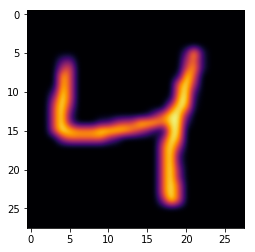

ラベル: tensor(5)


In [8]:
mnist_data = MNIST('~/tmp/mnist', train=True, download=True, transform=transforms.ToTensor())
data_loader = DataLoader(mnist_data,batch_size=4,shuffle=False)
data_iterator = iter(data_loader)

images, labels = data_iterator.next()
data = images[2].numpy()
plt.imshow(data.reshape(28, 28), cmap='inferno', interpolation='bicubic')
plt.show()

print('ラベル:', labels[0])

In [0]:
# 学習データ
train_data_with_label = MNIST('~/tmp/mnist', train=True, download=True, transform=transforms.ToTensor())
train_data_loader = DataLoader(train_data_with_label,batch_size=1000,shuffle=True)
# 検証データ
test_data_with_label = MNIST('~/tmp/mnist', train=False, download=True, transform=transforms.ToTensor())
test_data_loader = DataLoader(test_data_with_label,batch_size=1000,shuffle=False)

In [10]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

"""
学習パラメタを持つものはinitに、関数はforwardに。
公式チュートリアルはこの書き方。(Poolingもパラメタは無いからforward)
print(model)で出力されるのはinitに描かれたもの。
"""

class CNN(nn.Module):
    def __init__(self):
        # クラスの初期化
        super(CNN, self).__init__()
        # 画像を畳み込みを行うまで
        self.head = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(5, 5), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(5, 5), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # 畳み込みで得られたベクトルを出力層に順伝播させるまで
        self.tail = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )
 
    def forward(self, x):
        # 順伝播を計算する関数
        # :param x: 入力値
        h = self.head(x)
        h = h.view(-1, 320)
        """
        Tensorのサイズ変換関数
        １つ目の引数に-1を入れることで、２つ目の引数で指定した値にサイズ数を自動的に調整してくれます。
        Tensorの要素数が指定したサイズ数に合わない（割り切れない）場合、エラーになります。
        もちろん、サイズ数を指定することもできます。
        """
        h = self.tail(h)
        y = F.log_softmax(h)
        return y
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = CNN().cuda()
#model.to("cuda:0")
#model = net.Net(params).cuda() if params.cuda else net.Net(params)
#model.cuda()
print(torch.cuda.is_available())

cuda
True


In [0]:
from torch import optim
 
# 誤差関数の設定
loss_fn = nn.CrossEntropyLoss()  # 変数名にはcriterionも使われる
 
# 重みを学習する際の最適化手法の選択
optimizer = optim.Adam(model.parameters(), lr=0.01)
# ここまでが学習に必要な準備など

In [0]:
# 5. 学習と推論の設定
# 5-1. 学習1回でやることを定義します
# Chainerのtraining.Trainer()に対応するものはない
 
from torch.autograd import Variable
 
 
def train(epoch):
    model.train()  # ネットワークを学習モードに切り替える
 
    # データローダーから1ミニバッチずつ取り出して計算する
    for data, target in train_data_loader:
        data, target = Variable(data).cuda() , Variable(target).cuda()   # 微分可能に変換
        #print(data.size())
        optimizer.zero_grad()  # 一度計算された勾配結果を0にリセット
        #data = data.view(1, -1)
        #print('02')
        output = model(data)  # 入力dataをinputし、出力を求める
        #print('02')
        loss = loss_fn(output, target)  # 出力と訓練データの正解との誤差を求める
        loss.backward()  # 誤差のバックプロパゲーションを求める
        optimizer.step()  # バックプロパゲーションの値で重みを更新する
    print('epoch %d, loss: %.4f'
              % (epoch, loss))
    #print("epoch{}：終了\n".format(epoch))

In [0]:
# 5. 学習と推論の設定
# 5-2. 推論1回でやることを定義します
# Chainerのtrainer.extend(extensions.Evaluator())に対応するものはない
 
 
def test():
    model.eval()  # ネットワークを推論モードに切り替える
    correct = 0
 
    # データローダーから1ミニバッチずつ取り出して計算する
    for data, target in test_data_loader:
        data, target = Variable(data).cuda() , Variable(target).cuda()   # 微分可能に変換
        output = model(data)  # 入力dataをinputし、出力を求める
 
        # 推論する
        pred = output.data.max(1, keepdim=True)[1]  # 出力ラベルを求める
        #print(pred,target)
        correct += pred.eq(target.data.view_as(pred)).sum()  # 正解と一緒だったらカウントアップ
 
    # 正解率を出力
    data_num = len(test_data_loader.dataset)  # データの総数
    print('\nテストデータの正解率: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [19]:
# 6. 学習と推論の実行
for epoch in range(100):
    train(epoch)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0, loss: 0.0073
epoch 1, loss: 0.0276
epoch 2, loss: 0.0174
epoch 3, loss: 0.0107
epoch 4, loss: 0.0119
epoch 5, loss: 0.0044
epoch 6, loss: 0.0120
epoch 7, loss: 0.0085
epoch 8, loss: 0.0054
epoch 9, loss: 0.0082
epoch 10, loss: 0.0146
epoch 11, loss: 0.0164
epoch 12, loss: 0.0361
epoch 13, loss: 0.0028
epoch 14, loss: 0.0166
epoch 15, loss: 0.0092
epoch 16, loss: 0.0075
epoch 17, loss: 0.0121
epoch 18, loss: 0.0325
epoch 19, loss: 0.0037
epoch 20, loss: 0.0023
epoch 21, loss: 0.0050
epoch 22, loss: 0.0114
epoch 23, loss: 0.0237
epoch 24, loss: 0.0008
epoch 25, loss: 0.0024
epoch 26, loss: 0.0350
epoch 27, loss: 0.0072
epoch 28, loss: 0.0166
epoch 29, loss: 0.0224
epoch 30, loss: 0.0106
epoch 31, loss: 0.0008
epoch 32, loss: 0.0330
epoch 33, loss: 0.0042
epoch 34, loss: 0.0249
epoch 35, loss: 0.0278
epoch 36, loss: 0.0011
epoch 37, loss: 0.0051
epoch 38, loss: 0.0057
epoch 39, loss: 0.0072
epoch 40, loss: 0.0120
epoch 41, loss: 0.0039
epoch 42, loss: 0.0052
epoch 43, loss: 0.043

In [0]:
# 何度も学習するのだるい
test()